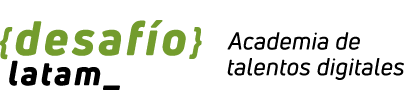

<center><h1> <font color='green'>Detección de dígitos con clustering</font></h1></center>

Veremos a continuación cómo el uso de clusters nos permite identificar algunos patrones, específicamente dígitos. Para ello, observa primero algunas imágenes de dígitos diferenrtes, almacenadas en MNIST (conjunto de datos incuido en algunas de las bibliotecas que cargamos).

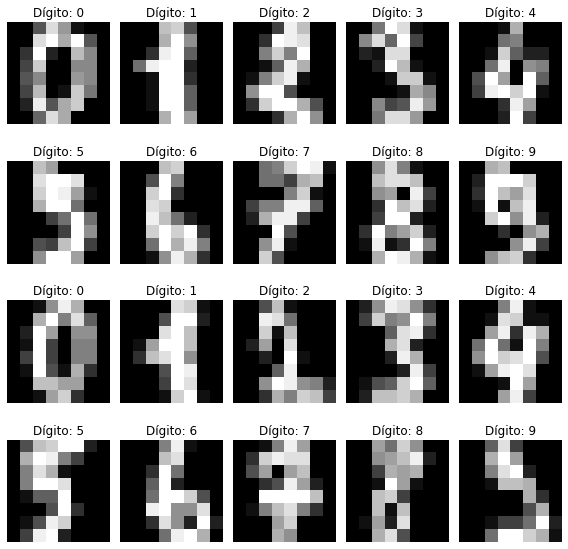

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Cargar el conjunto de datos MNIST
digits = load_digits()

# Obtener las imágenes y las etiquetas
imagenes = digits.images[:20]
etiquetas = digits.target[:20]

# Configurar el sulplot
fig, axs = plt.subplots(4,5, figsize=(8,8))

# Iterar sobre las imágenes y etiquetas
for i, (imagen,etiqueta) in enumerate(zip(imagenes,etiquetas)):
    #obtener las coordenadas del subplot actual
    row = i // 5
    col = i % 5

# Mostrar la imagen en el subplot correspondiente
    axs[row,col].imshow(imagen, cmap='gray')
    axs[row,col].set_title(f"Dígito: {etiqueta}")
    axs[row,col].axis('off')

    #ajustar los espacios entre los subplots
plt.tight_layout()

#Mostrar el gráfico
plt.show()

Observa que las imágenes de los dígitos son difernetes entre sí, aunque en parte pueden distinguirse. Cada imagen está codificada en una matriz de números, que contiene información sobre la tonalidad de cada pixel que compone  la figura.

Tomaremos ahora el conjunto de todas las imágenes de los dígitos y aplicaremos una reducción de dimensionalidad realizando un análisis de componentes principales (PCA), asignando 2 dimensiones. Observa como nuestra matriz correspondiente al dígito 0 se reduce a solo 2 valore

In [ ]:
X=digits.data
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

print(X[0])
print(X_pca[0])

[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]
[-1.25946594 21.27488179]


Vamos a generar ahora 10 clusters (más adelante veremos cómo), agrupando estos datos. Para hacer esto, representaremos en un scatter plot todos los "puntos" generados por las reducciones de dimensionalidad, y los agruparemos por cercanía entre ellos.

/home/pedro/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


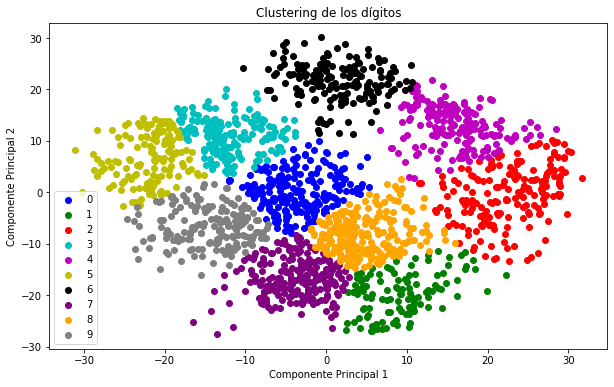

In [ ]:
kmeans = KMeans(n_clusters=10,random_state=42)
clusters = kmeans.fit_predict(X_pca)
plt.figure(figsize=(10,6))
colors=['b','g','r','c','m','y','k','purple','orange','gray']
for i in range(10):
    cluster_points=X_pca[clusters==i]
    plt.scatter(cluster_points[:,0],cluster_points[:,1],c=colors[i],label=str(i))
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.title("Clustering de los dígitos")
plt.legend()
plt.show()

Como cabría esperar, los puntos correspondientes a cada dígito se "parecen" entre ellos. Naturalmente, en este caso ya conociamos el resultaod de antemano, pero si no lo hubiéramos conocido esta detección de clusters nos habría permitido identificar adecuadamente los patrones.